# PART I: GENERAL DATASET EXPLORATION PHASE Part 1
#### Goal: Understand how to handle/load the annotations files provided with the dataset

Sample Variant Annotation
Image: 1025794, Variant: 707-320
Image: 1340192, Variant: 707-320
Image: 0056978, Variant: 707-320
Image: 0698580, Variant: 707-320
Image: 0450014, Variant: 707-320
Image path: images_airplane\1025794.jpg


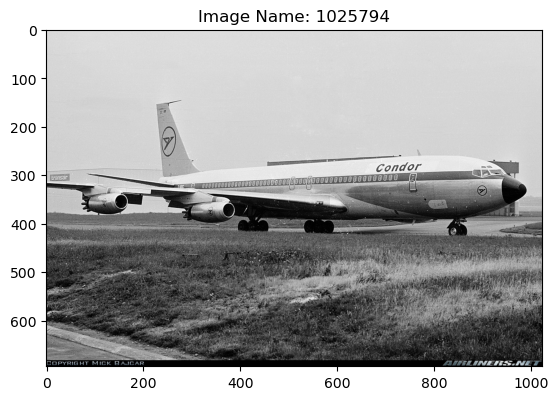

Image path: images_airplane\1340192.jpg


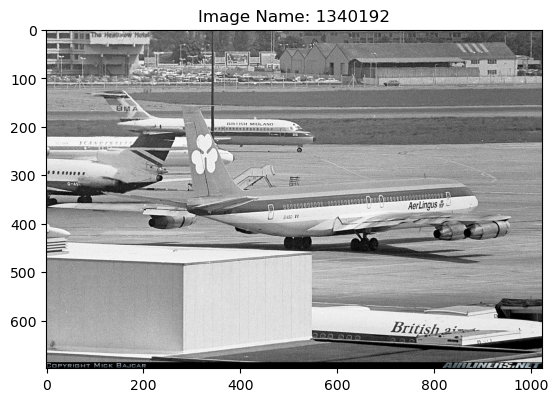

Image path: images_airplane\0056978.jpg


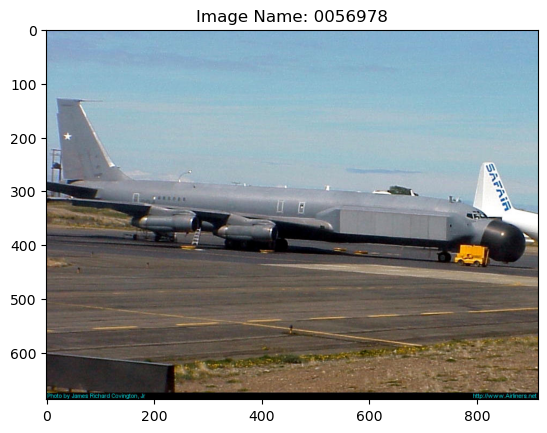

Image path: images_airplane\0698580.jpg


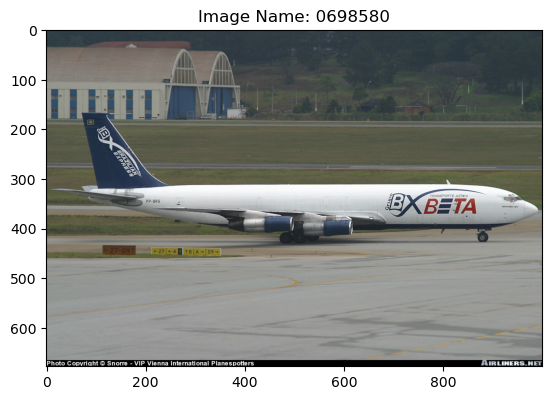

Manufacturer: ATR, Number of Images: 66
Manufacturer: Airbus, Number of Images: 434
Manufacturer: Antonov, Number of Images: 34
Manufacturer: Beechcraft, Number of Images: 67
Manufacturer: Boeing, Number of Images: 733
Manufacturer: Bombardier Aerospace, Number of Images: 0
Manufacturer: British Aerospace, Number of Images: 0
Manufacturer: Canadair, Number of Images: 134
Manufacturer: Cessna, Number of Images: 133
Manufacturer: Cirrus Aircraft, Number of Images: 0
Manufacturer: Dassault Aviation, Number of Images: 0
Manufacturer: Dornier, Number of Images: 34
Manufacturer: Douglas Aircraft Company, Number of Images: 0
Manufacturer: Embraer, Number of Images: 233
Manufacturer: Eurofighter, Number of Images: 33
Manufacturer: Fairchild, Number of Images: 33
Manufacturer: Fokker, Number of Images: 100
Manufacturer: Gulfstream Aerospace, Number of Images: 0
Manufacturer: Ilyushin, Number of Images: 33
Manufacturer: Lockheed Corporation, Number of Images: 0
Manufacturer: Lockheed Martin, Num

In [1]:

#------------------------------------------------------------------------------------
# Part I: GENERAL DATASET EXPLORATION PHASE 
# Goal: Understand how to handle/load the annotations files provided with the dataset
#

import os
import pandas as pd
import matplotlib.pyplot as plt
# open image file and returns an Image object
from PIL import Image

# Dataset path
dataset_dir = '.'


# Function: Annotations Loader
# It will correctly associate each image with its annotation
# Annotations loeader function. (Load annotations from text files)
def annotations_load(file_path):
    # create annotations dict
    annotations = {}
    # read annotation file
    with open(file_path, 'r') as file:
        for line in file:
            # remove leading characters split at whitespaces
            line = line.strip().split()
            if len(line) > 1:
                image_name = line[0]
                annotation = ' '.join(line[1:])
                annotations[image_name] = annotation
    return annotations

#--------------------------------------------------------------------------------------
# Manufacturers Mapping
# dictionary that maps manufactures to images
# This mapping is useful to understand the distribution of images across different manufacturers.
# Load manufactures mapping from manufacturers.txt
manufacturers_mapping = {}
# open/load manufacturers.txt
with open('manufacturers.txt', 'r') as manufacturers_file:
    for line in manufacturers_file:
        manufacturer = line.strip()
        manufacturers_mapping[manufacturer] = []

#--------------------------------------------------------------------------------------
# Processing and Exploring Training Annotations
# for model variants, model families and manufactures
annotations_variant =  annotations_load('images_variant_train.txt')
annotations_family =  annotations_load('images_family_train.txt')
annotations_manufacturer =  annotations_load('images_manufacturer_train.txt')

# Associate manumanufacturers with images based on annotations
for image_name, annotation in annotations_manufacturer.items():
   # Deal with manufacturers that are space-separated
    manufacturers = annotation.split()
    for manufacturer in manufacturers:
        if manufacturer in manufacturers_mapping:
            manufacturers_mapping[manufacturer].append(image_name)

# Display some sample annotations to check data was loaded correctly
print("Sample Variant Annotation")
for image_name, variant in list(annotations_variant.items())[:5]:
    print(f"Image: {image_name}, Variant: {variant}")
    
# Load list of image filenames for explorations
image_filenames = pd.read_csv('images_train.txt', header=None, dtype=str)

# Image Display uses PIL to load and display images
# Display some images
samples_to_display = 4

for i in range(samples_to_display):
    # use iloc to access values
    image_name = image_filenames.iloc[i, 0]
    # Pad with zeros to ensure 7 digits when number is not 7 digits
    image_name_with_zeros = image_name.zfill(7)
    image_path = os.path.join('images_airplane', f'{image_name_with_zeros}.jpg')
    
    # Error Handling: Check if image exists before trying to open it.
    # Check if the image file exists
    if not os.path.exists(image_path):
        print(f"Image not found: {image_name_with_zeros}")
        print(f"Image path: {image_path}")     
    else:
        # load/display image using PIL
        img = Image.open(image_path)
        print(f"Image path: {image_path}")
        plt.imshow(img)
        plt.title(f"Image Name: {image_name_with_zeros}")
        plt.show()
        
# procees the manufacturers mapping
for manufacturer, image_list in manufacturers_mapping.items():
    print(f"Manufacturer: {manufacturer}, Number of Images: {len(image_list)}")


# PART II: DATA EXPLORATION PHASE 
#### Goal: Identify any class imbalances that might affect model training.

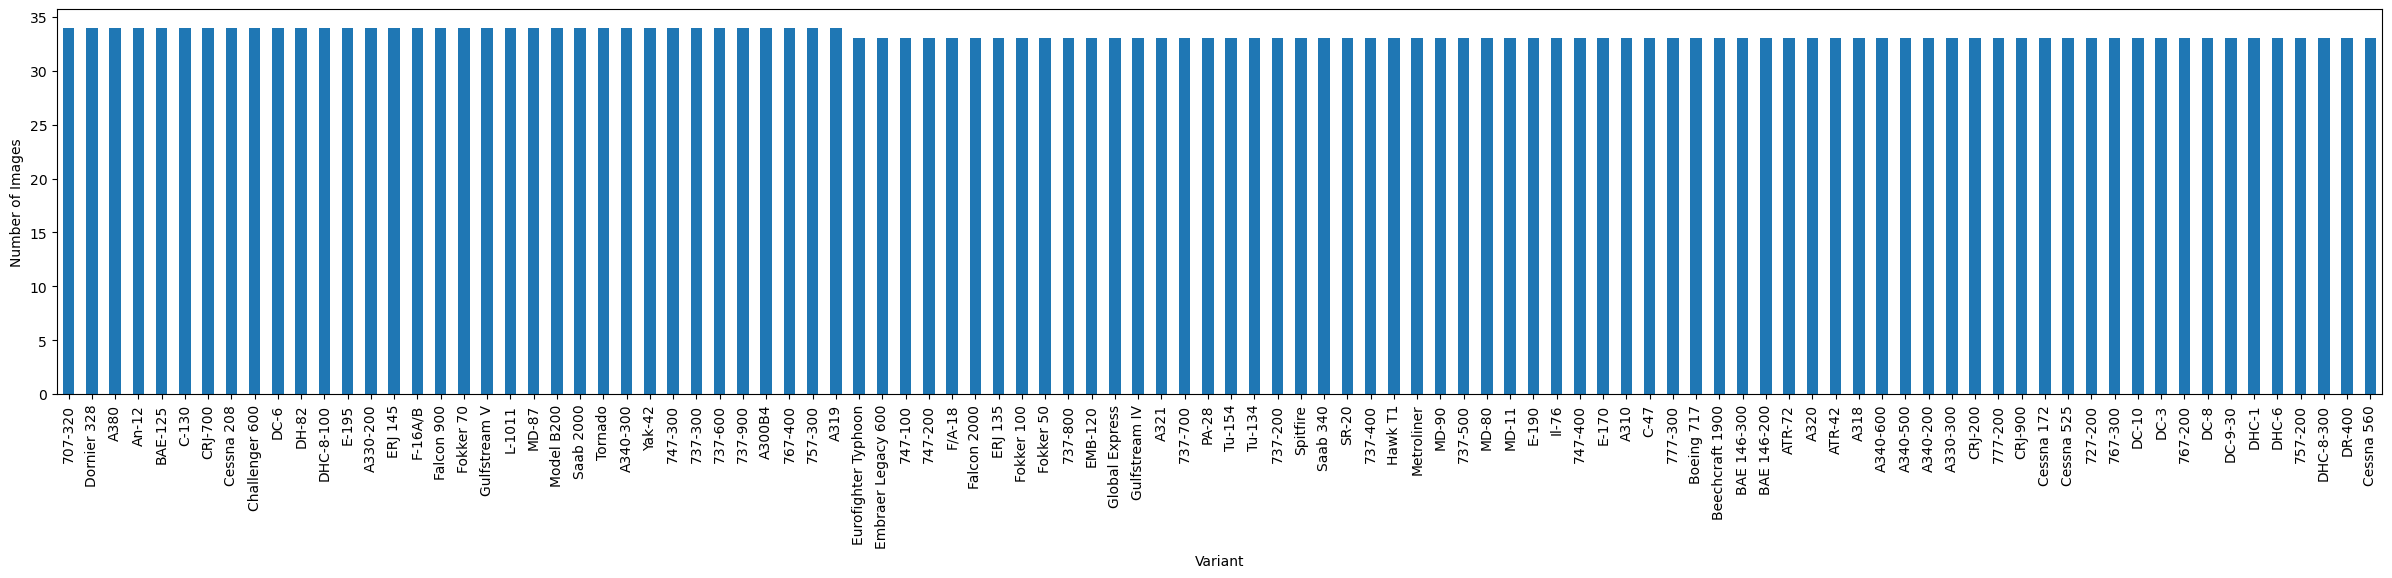

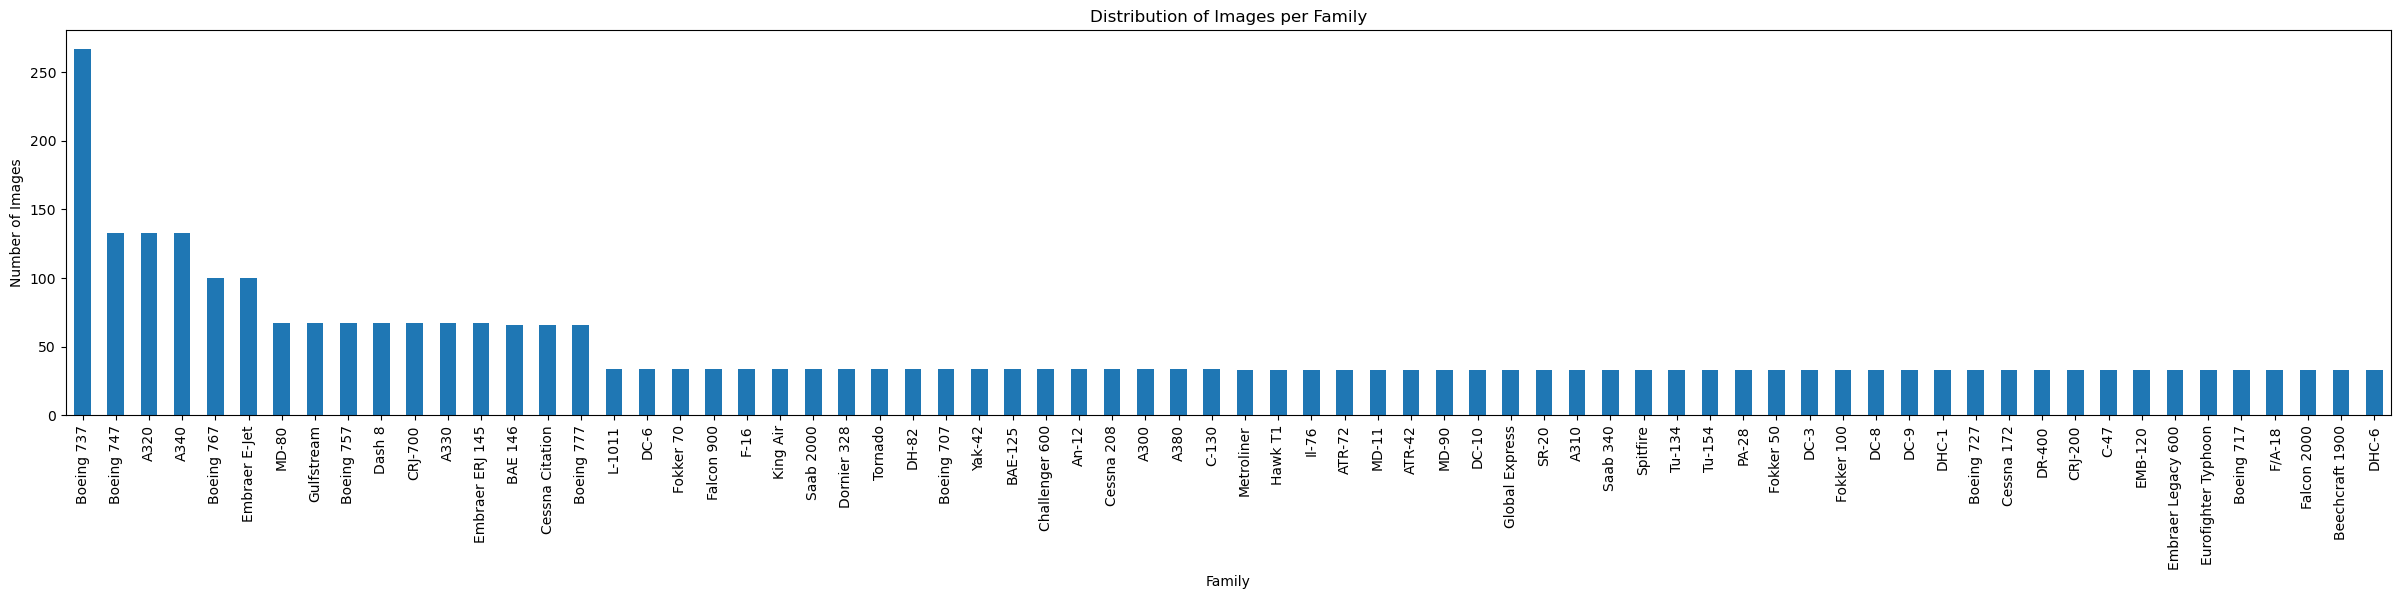

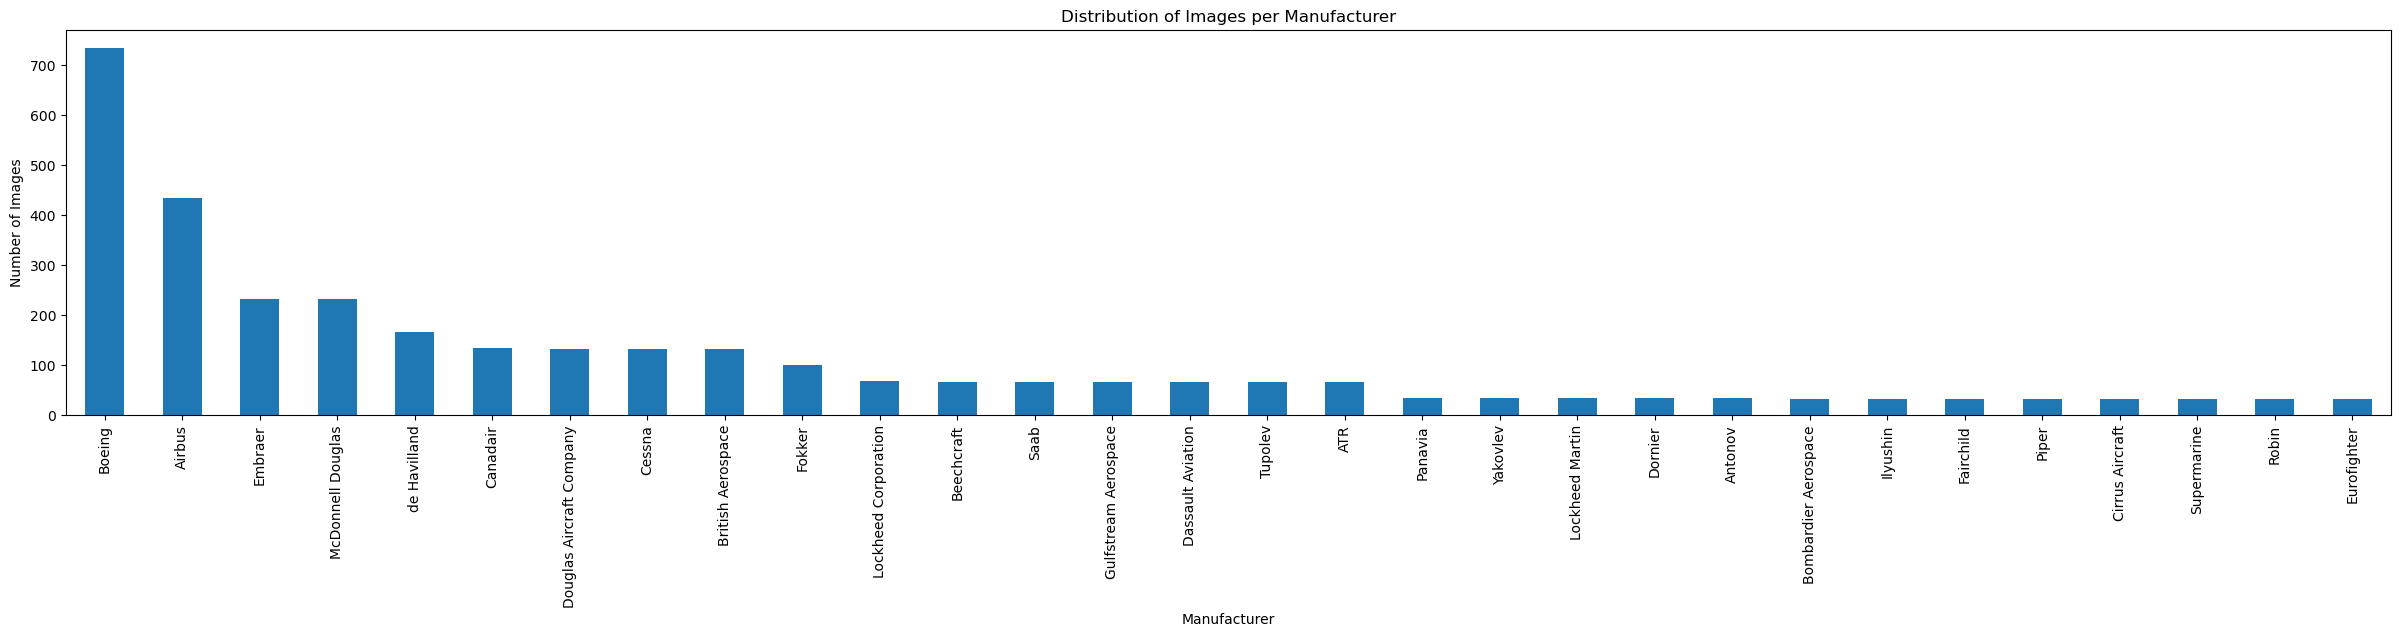

Variant Counts:
 707-320        34
Dornier 328    34
A380           34
An-12          34
BAE-125        34
               ..
DHC-6          33
757-200        33
DHC-8-300      33
DR-400         33
Cessna 560     33
Length: 100, dtype: int64
Family Counts:
 Boeing 737         267
Boeing 747         133
A320               133
A340               133
Boeing 767         100
                  ... 
Boeing 717          33
F/A-18              33
Falcon 2000         33
Beechcraft 1900     33
DHC-6               33
Length: 70, dtype: int64
Manufacturer Counts:
 Boeing                      733
Airbus                      434
Embraer                     233
McDonnell Douglas           232
de Havilland                167
Canadair                    134
Douglas Aircraft Company    133
Cessna                      133
British Aerospace           133
Fokker                      100
Lockheed Corporation         68
Beechcraft                   67
Saab                         67
Gulfstream Aerospace       

In [2]:
#------------------------------------
# Part 2: DATA EXPLORATION PHASE 
#------------------------------------
# Data Distribution Analysis: Analyze the distribution of images across different variants, families, and manufacturers. 
# Goal: Identify any class imbalances that might affect model training.

# Load annotations
annotations_variant = annotations_load('images_variant_train.txt')
annotations_family = annotations_load('images_family_train.txt')
annotations_manufacturer = annotations_load('images_manufacturer_train.txt')

# Count the number of images per variant, family and manufacturer
variants_counter =  pd.Series(annotations_variant.values()).value_counts()
family_counter = pd.Series(annotations_family.values()).value_counts()
manufacturer_counter = pd.Series(annotations_manufacturer.values()).value_counts()

# plot the obtained distributions
plt.figure(figsize=(30, 5))
                     
# Variant Distribution
#plt.subplot(1, 2, 1)
variants_counter.plot(kind='bar')
plt.xlabel('Variant')
plt.ylabel('Number of Images')
plt.show() 

# Family Distribution
#plt.subplot(1, 3, 2)
plt.figure(figsize=(30, 5))
family_counter.plot(kind='bar')
plt.title('Distribution of Images per Family')
plt.xlabel('Family')
plt.ylabel('Number of Images')
plt.show() 

# Manufacturer Distribution
#plt.subplot(1, 3, 3)
plt.figure(figsize=(30, 5))
manufacturer_counter.plot(kind='bar')
plt.title('Distribution of Images per Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Images')
plt.show()           

# print out counts
print("Variant Counts:\n", variants_counter)
print("Family Counts:\n", family_counter)
print("Manufacturer Counts:\n", manufacturer_counter)

# PART III: DATA EXPLORATION PHASE
#### Goal: Understand the distribution of quality and resolution for the dataset

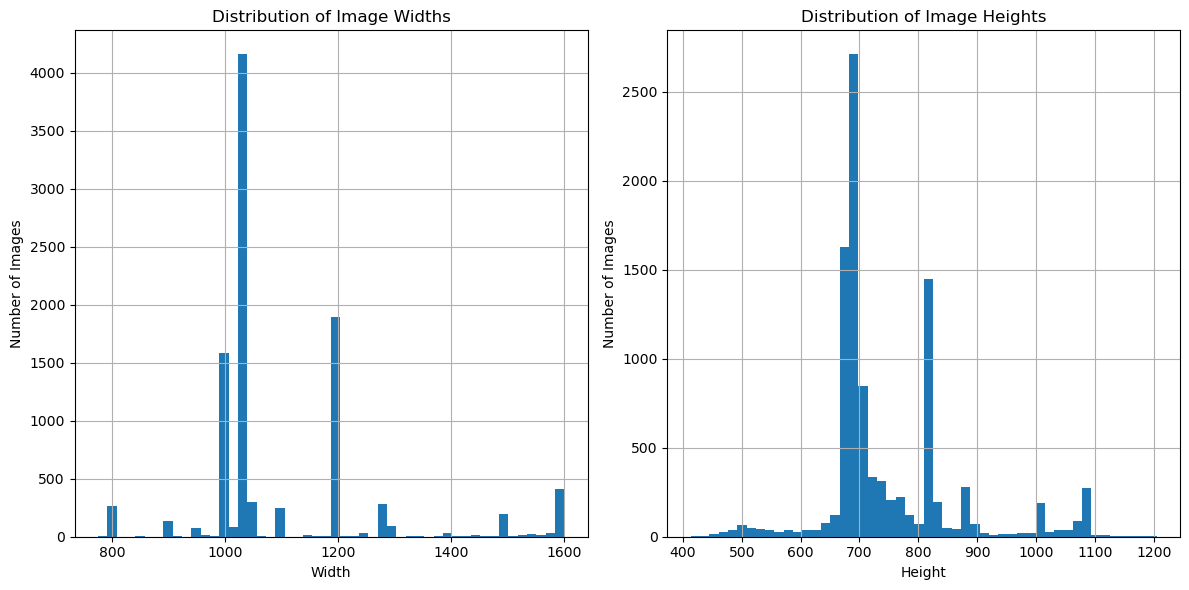

              Width        Height
count  10000.000000  10000.000000
mean    1099.617800    747.722600
std      163.499604    113.235995
min      775.000000    413.000000
25%     1024.000000    693.000000
50%     1024.000000    699.000000
75%     1200.000000    812.000000
max     1600.000000   1205.000000


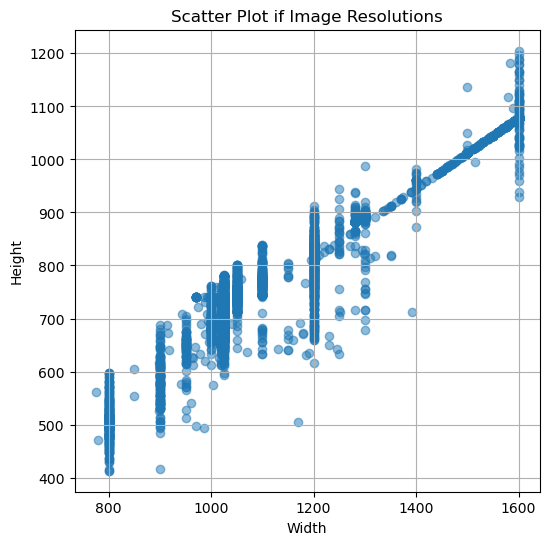

In [3]:
#------------------------------------
# Part III: DATA EXPLORATION PHASE 
#------------------------------------
# Image Resolution and Quality: Evaluate the resolution and quality of the images 
# Goal: Understand the distribution of quality and resolution for the dataset


from PIL import Image, UnidentifiedImageError


# Create function to get image resolution
def get_image_res(image_dir):
    # List: store image dimensions
    resolutions = []
    # List: Track potential error files
    error_files = []
    for image_name in os.listdir(image_dir):
        # check if file is an image
        if image_name.endswith('.jpg'):
            image_path = os.path.join(image_dir, image_name)
            try:
                with Image.open(image_path) as img:
                    resolutions.append(img.size)
            except (IOError, UnidentifiedImageError):
                print(f"Cannot identify image file {image_path}: possible corrupted image")
                # Log the error
                error_files.append(image_path)
                # skip file and continue to next 
                continue   
    return resolutions, error_files

# Path to images
images_dir = 'images_airplane'

# Get list with image resolutions
image_resolutions, error_files =  get_image_res(images_dir)

# Convert information to a dataframe for further analysis
res_df = pd.DataFrame(image_resolutions, columns=['Width', 'Height'])

# Plot the distribution of image resolutions
plt.figure(figsize=(12, 6))

# Plot width distribution
plt.subplot(1, 2, 1)
res_df['Width'].hist(bins=50)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Number of Images')


# Plot height distribution
plt.subplot(1, 2, 2)
res_df['Height'].hist(bins=50)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()

# Print out some statistics
print(res_df.describe())

# create scatter plot to see relationship between width and height 
plt.figure(figsize=(6,6))
plt.scatter(res_df['Width'], res_df['Height'], alpha=0.5)
plt.title('Scatter Plot if Image Resolutions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid(True)
plt.show()

def print_width():   
    # Set pandas to display all rows
    # uncomment code if you need to see all the data
    pd.set_option('display.max_rows', None)

    # calculate the frequency distribution of an image widths
    width_freq_dist =  res_df['Width'].value_counts().sort_index()

    # convert frequence distribution to a DataFrame to create a readable table format
    width_freq_table = pd.DataFrame(width_freq_dist)
    width_freq_table.reset_index(inplace=True)
    width_freq_table.columns = ['Width', 'Frequency']

    # print the table
    print(width_freq_table)
    
def print_height():   
    # Set pandas to display all rows
    # uncomment code if you need to see all the data
    pd.set_option('display.max_rows', None)

    # calculate the frequency distribution of an image widths
    height_freq_dist =  res_df['Height'].value_counts().sort_index()

    # convert frequence distribution to a DataFrame to create a readable table format
    height_freq_table = pd.DataFrame(height_freq_dist)
    height_freq_table.reset_index(inplace=True)
    height_freq_table.columns = ['Height', 'Frequency']
 

# PART IV: SPECIFIC EXPLORATION PHASE 
#### Goal: Use a pre-trained deep learning model VGG19 to classify images 

this is image dir images_airplane
Filtered Images: 1033


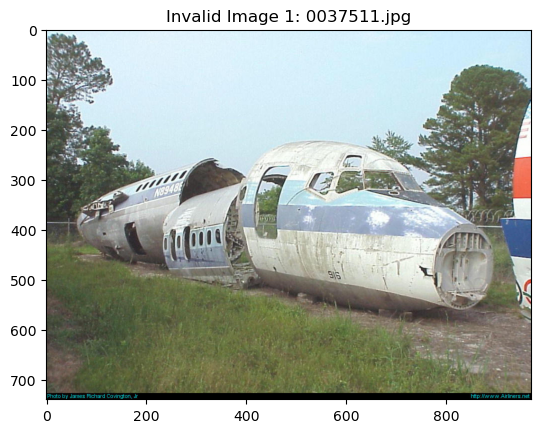

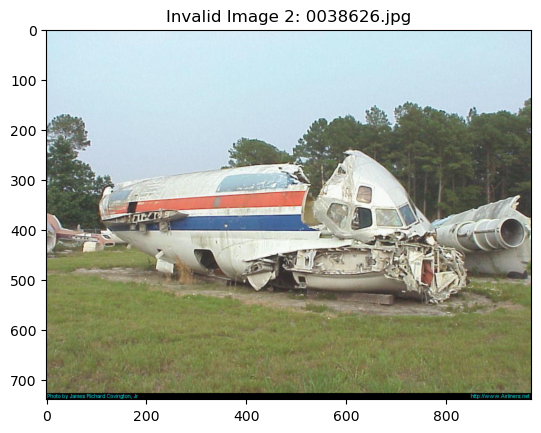

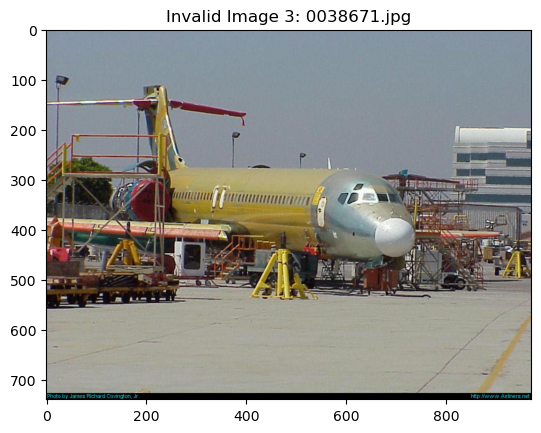

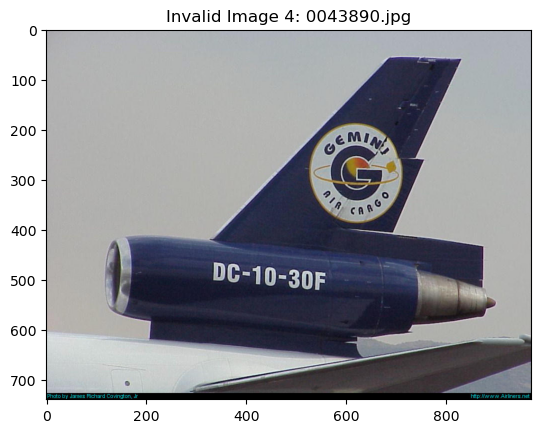

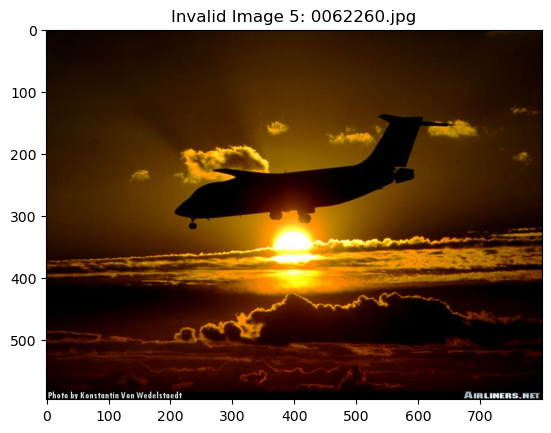

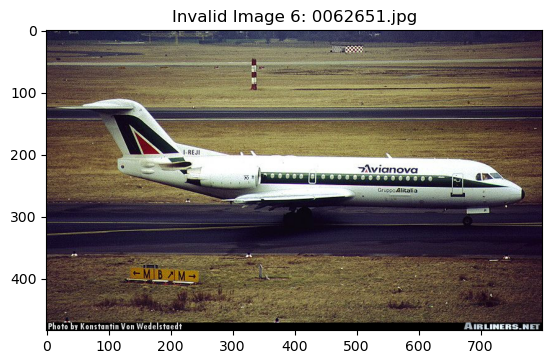

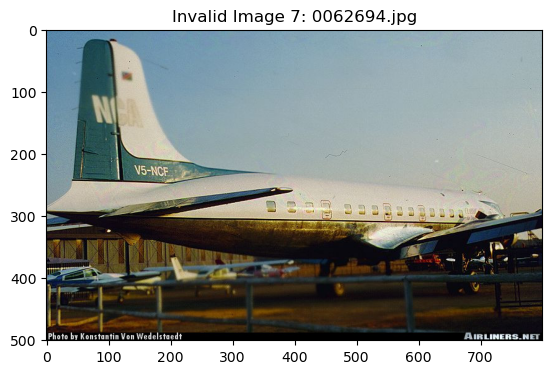

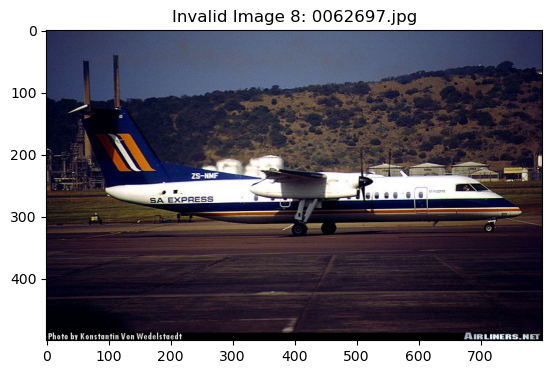

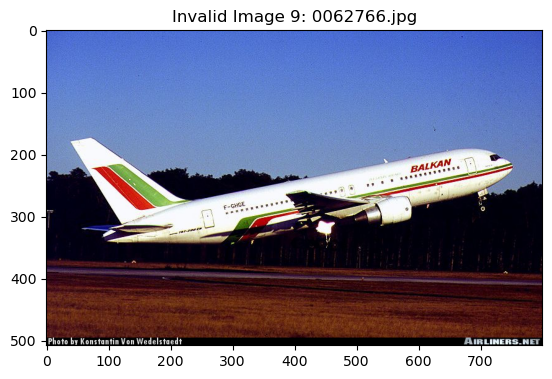

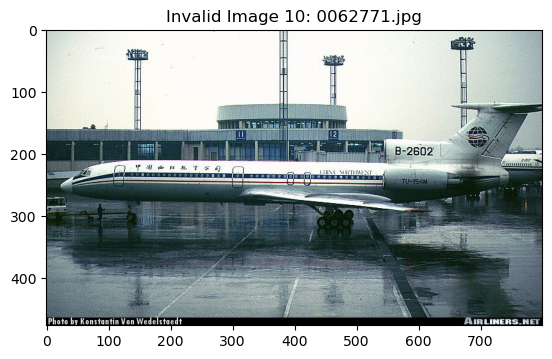

this is image dir end block images_airplane


In [4]:
#---------------------------------------------------------------------------
# PART IV: SPECIFIC EXPLORATION PHASE 
# Goal: Use a pre-trained deep learning model VGG19 to classify images 
#------------------------------------------------------------------------

# load VGG19 model and process its outputs
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
# use for image preprocessing
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Specific Dataset Exploration Analysis
# Use a pre-trained deep learning model VGG19 to classify images and identify specifict objects.
# Goal: Process the images in the dataset to determine if the image contains a complete airplane or complete warplane
# Process
# 1- Images are loaded and preprocessed for VGG19
# 2- Model predicts the class of each image
# 3- If top prediction is below threshold 0.5. The image will be invalid
# 4- If image cannot be openend or processed (corrupt) file will be skipped

unknown_imgs = []

# Load pre-trained VGGNet-19 model. Use for classification tasks
model = VGG19(weights='imagenet')
corrupt_images = []


# Path to the directory containing the images
image_dir = 'images_airplane'
print("this is image dir", image_dir)

for filename in os.listdir(image_dir):
    # added error handling exception to graceful skip files that cannot be loaded
    try:
        img_path = os.path.join(image_dir, filename)
        # image is loaded and resize to 224x224 pixels which is the size expected by VGG19
        img = image.load_img(img_path, target_size=(224, 224))  # VGGNet-19 input size
        # convert image to a numpy array and preprocessed
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        # Get model predictions
        # set verbose to 0 to limit outputlines
        predictions = model.predict(x, verbose=0)
        
        # Decode predictions and print the top 3 predictions for each image
        #print('Predictions for', filename)
        type_of_plane = decode_predictions(predictions, top=2)[0][0][1]
        #print(type(type_of_plane))
        if type_of_plane!= "airliner":
            if type_of_plane!= "warplane":
                if type_of_plane!= "airship":
                    unknown_imgs.append(filename) 
    except IOError:
        print(f"Cannot open or process {filename}. Skipping.")

print("Filtered Images:", len(unknown_imgs))
    
# Display the first 10 invalid images
for i, filename in enumerate(unknown_imgs[:10]):
    img_path = os.path.join(image_dir, filename)
    try:
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Invalid Image {i+1}: {filename}")
        plt.show()
    except IOError:
        print(f"Cannot open {filename}. Skipping.")   

print("this is image dir end block", image_dir)

# PART V: PROCESSING AND PREPARING THE DATASET 
#### Goal: Processing and preparing the dataset for training our deep learning model 

In [5]:
import os
import numpy as np
import shutil
import pandas as pd
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import sys
#-----------------------------------------------------------------------------------
# PART V: PROCESSING AND PREPARING THE DATASET 
# Goal: Processing and preparing the dataset for training our deep learning model  
#-----------------------------------------------------------------------------------
#-----------------------------------------------------------------------------
# Processing and preparing the dataset for training our deep learning model 
# while handling corrupt or invalid images
# Approach divide 75%-25%
# Define the dataset directory
#dataset_dir = '/home/dcorredor/github/fgvc-aircraft-2013b/data'  # Update this with the path to dataset
image_dir = 'images_airplane'  # Update this with the path to to images

# Function to check if an image is corrupt
def is_image_corrupt(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verify if the image is corrupt
        return False
    except (IOError, UnidentifiedImageError):
        return True

# Function to filter out corrupt images from the DataFrame
def filter_corrupt_images(df, image_dir):
    corrupt_images = []
    for index, row in df.iterrows():
        image_path = os.path.join(image_dir, row['ImageName'])
        if is_image_corrupt(image_path):
            corrupt_images.append(row['ImageName'])
    # Remove corrupt images from the DataFrame
    return df[~df['ImageName'].isin(corrupt_images)], corrupt_images

# Function to split the dataset into training and validation sets with a 75/25 split
def split_dataset(df, split_ratio=0.75):
    # Shuffle the DataFrame
    shuffled_df = df.sample(frac=1).reset_index(drop=True)
    
    # Calculate the split index
    split_index = int(len(shuffled_df) * split_ratio)
    
    # Split into training and validation sets
    train_df = shuffled_df[:split_index]
    val_df = shuffled_df[split_index:]
    
    return train_df, val_df

# Function to read, process, and split the data
def read_process_split_data(file_path, image_dir, split_ratio=0.75):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    image_names, aircraft_types = [], []
    for line in lines:
        parts = line.split()
        if len(parts) == 2:
            image_names.append(parts[0] + '.jpg')  # Add '.jpg' extension
            aircraft_types.append(parts[1])

    df = pd.DataFrame({'ImageName': image_names, 'AircraftType': aircraft_types})
    filtered_df, corrupt_images = filter_corrupt_images(df, image_dir)
    
    # Split the filtered DataFrame into training and validation sets
    train_df, val_df = split_dataset(filtered_df, split_ratio)
    
    return train_df, val_df, corrupt_images

# Read, process, and split the data
train_df, val_df, corrupt_images = read_process_split_data(
    os.path.join('images_manufacturer_train.txt'), 
    image_dir,
    split_ratio=0.75
)


# Initialize ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

# Initialize train_generator
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

# Initialize validation_generator
validation_generator = train_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
)

# Print out the number of images in each set and the number of corrupt images
print(f"Number of images in training set: {len(train_df)}")
print(f"Number of images in validation set: {len(val_df)}")
print(f"Number of corrupt images: {len(corrupt_images)}")


Found 1775 validated image filenames belonging to 20 classes.
Found 592 validated image filenames belonging to 20 classes.
Number of images in training set: 1775
Number of images in validation set: 592
Number of corrupt images: 0


# PART VI: CNN Model 1 
#### Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function

In [6]:
#--------------------------------------------------------------------------------------
# PART VI: CNN Model 1 
# Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function
#--------------------------------------------------------------------------------------


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Number of classes - update this based on your dataset
num_classes = len(train_generator.class_indices)  # Assuming train_generator is defined as before

# Building the CNN model
model = Sequential()
# Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# MaxPooling layer to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding more convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the output from the convolutional layers
model.add(Flatten())
# Dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))
# Dropout layer to reduce overfitting
model.add(Dropout(0.5))
# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()

# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# PART VII: CNN Model 2 
#### Implementing Data augmentation and early stopping in order to reduce overfitting and improve data validation

In [7]:
#--------------------------------------------------------------------------------------
# PART VII: CNN Model 2
# Implementing Data augmentation and early stopping in order to reduce overfitting
# and improve data validation data
#--------------------------------------------------------------------------------------


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


# Number of classes - based dataset
num_classes = len(train_generator.class_indices)  # Assuming train_generator is defined as before


# Building the CNN model
model = Sequential()
# Convolutional layer with 32 filters, kernel size of 3x3, ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# MaxPooling layer to reduce the spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))
# Adding more convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the output from the convolutional layers
model.add(Flatten())
# Dense layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))
# Dropout layer to reduce overfitting
model.add(Dropout(0.5))
# Output layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Model summary
model.summary()


# Data Augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation data, only rescaling
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator with augmented data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Training the model with Early Stopping
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # You can adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[early_stopping]
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

# PART VIII: CNN Model 3
#### Implementing a fine-tuning a pretrained model VGG16 

In [8]:
#--------------------------------------------------------------------------------------
# PART VIII: CNN Model 3 
# Implementing a fine-tuning a pretrained model VGG16 
# this will be powerful technique that will help the limitations of training data
#--------------------------------------------------------------------------------------

# Steps behind this model version 3
# 1. Load the Pretrained VGG16 Model: Load the VGG16 model without its top layer we are adding our own classification layers
# and set the input shape to match our images
# 2. Freeze the Layers of VGG16: Initially, the weights of the VGG16 layers will be frozen so they don't update during training
# The reason behind this is because these layers already contain valuable information about general features.
# 3. Add Custom Classification Layers: Add our own layers for the specific classification task.
# 4. Compile and Train the Model: After some initial training, we can optionally unfreeze some of the top layers of VGG16 
# and continue training for fine-tuning.

# Rationality behind the changes
# When fine-tuning the VGG16 pretrained model, we are still using the images from the FGVC dataset. 
# The process involves adapting a model that has been previously trained on a large dataset. 
# For instance, ImageNet, which contains millions of images across thousands of categories to our specific task, 
# which in our case is aircraft classification.
#
# We are sill using the images from the FGVC dataset for training and validation
# The pretrained VGG16 acts as a feature extractor.
# It has learned to recognize a variety of features from the ImageNet dataset 
# and these features can be useful for our classification task as well
#
# During the training phase, the FGVC images are passsed through the base VGG16 model 
# the VGG16 model acts as a complex feature extractor
# After this it will pass through the new layers we have added.
# this is the way the model learns to classify our specific images based on features extracted by VGG16
# and the patters learned in the new layers


import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Loading VGG16 Model Without Top Layer
# Load the VGG16 model, pretrained on ImageNet data, without the top layer
# The "top layer" VGG16 refers to the final fully connected layers that make the final classification decision 
# in the original model. 
# When we load VGG16 without its top layer, we are removing these layers because they are specific
# to the original task (classifying ImageNet categories) and not relevant to your task (classifying aircraft).
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Adding our Own Classification Layers
# Create custom layers for our task
# these layers will learn from the FGVC dataset during the training process
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)  # num_classes should be set to your dataset's number of classes

# Create the new model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# PART IX: CNN Model 4
#### Implementing a fine-tuning a pretrained model VGG16 
##### Unfreeze some of the top layers of the base model and recompile the model

In [9]:
import os
import numpy as np
import shutil
import pandas as pd
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import sys
#--------------------------------------------------------------------------------------
# PART IX: CNN Model 4
# Implementing a fine-tuning a pretrained model VGG16 
# Fine-tuning
# Unfreeze some of the top layers of the base model and recompile the model
#--------------------------------------------------------------------------------------

# Steps behind this model version 4
# Unfreeze some of the top layers of the base model and recompile the model
for layer in base_model.layers[-4:]:
     layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,  # Adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# PART X: CNN Model 5
#### Implementing a fine-tuning a pretrained model VGG16 
##### Unfreeze some of the top layers of the base model and recompile the model
##### Increase epochs to 20

In [10]:
#--------------------------------------------------------------------------------------
# PART X: CNN Model 5
# Implementing a fine-tuning a pretrained model VGG16 
# Fine-tuning
# Unfreeze some of the top layers of the base model and recompile the model
# Increase epochs to 20
#--------------------------------------------------------------------------------------

# Previously we choose to freeze the weights of the VGG16 layers (No update them during training)
# We only train the new layers we added. This is configured this way because the VGG16 layers already have
# useful information for feature extraction.
# when fine-tunning the top layers will be unfreezed and train them along the new layers
# This will allow the model to better adapt to the specifics of the FGVC model
# Goals: 
# 1. Adaptation to speficic features of our specific tasks for aircraft classification
# 2. Balancing generalization and specialization. Unfreezen the top layers achieves a balance between retaining general features
# learned and adapting ro specific features. 
# 3. Improve performance in accuracy and generalization

import os
import numpy as np
import shutil
import pandas as pd
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import sys
# Steps behind this model version 4
# Unfreeze some of the top layers of the base model and recompile the model
for layer in base_model.layers[-4:]:
     layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,  # Adjust the number of epochs
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# PART XI: CNN Model 6
#### Implementing a fine-tuning a pretrained model VGG16 
##### Implementing a fine-tuning a pretrained model VGG16 
##### Adjust Learning Rate and Use Learning Rate Schedulers

In [11]:
#--------------------------------------------------------------------------------------
# PART XI: CNN Model 6
# Implementing a fine-tuning a pretrained model VGG16 
# Fine-tuning
# Adjust Learning Rate and Use Learning Rate Schedulers
# Reasoning: A smaller learning rate can help the model to converge better during fine-tuning.
# Also. implement learning rate schedulers to adjust the learning rate during training.
#--------------------------------------------------------------------------------------

import os
import numpy as np
import shutil
import pandas as pd
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.callbacks import LearningRateScheduler
from PIL import Image
import sys
# Function to update the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Compile the model with a smaller initial learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the scheduler
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[callback]
)

Epoch 1/20
56/56 [==============================] - 142s 3s/step - loss: 0.8934 - accuracy: 0.6901 - val_loss: 1.1884 - val_accuracy: 0.6284 - lr: 1.0000e-05
Epoch 2/20
56/56 [==============================] - 140s 2s/step - loss: 0.8853 - accuracy: 0.6890 - val_loss: 1.1443 - val_accuracy: 0.6571 - lr: 1.0000e-05
Epoch 3/20
56/56 [==============================] - 141s 3s/step - loss: 0.8569 - accuracy: 0.7115 - val_loss: 1.1832 - val_accuracy: 0.6233 - lr: 1.0000e-05
Epoch 4/20
56/56 [==============================] - 141s 3s/step - loss: 0.8365 - accuracy: 0.7121 - val_loss: 1.1594 - val_accuracy: 0.6453 - lr: 1.0000e-05
Epoch 5/20
56/56 [==============================] - 141s 3s/step - loss: 0.8074 - accuracy: 0.7290 - val_loss: 1.1649 - val_accuracy: 0.6436 - lr: 1.0000e-05
Epoch 6/20
56/56 [==============================] - 141s 3s/step - loss: 0.8188 - accuracy: 0.7189 - val_loss: 1.1831 - val_accuracy: 0.6385 - lr: 1.0000e-05
Epoch 7/20
56/56 [==============================] - 

# PART XII: CNN Model 7
#### Implementing a fine-tuning a pretrained model VGG16 
#### Include a more aggressive data augmentation in this model 
#### by modifying the ImageDataGenerator to include additional transformation

In [12]:
#--------------------------------------------------------------------------------------
# PART XII: CNN Model 7
# Implementing a fine-tuning a pretrained model VGG16 
# Fine-tuning
# Include a more aggressive data augmentation in this model 
# by modifying the ImageDataGenerator to include additional transformation
#--------------------------------------------------------------------------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

# Initialize more aggressive ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Random rotations in the range 0-40 degrees
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest'       # Strategy for filling newly created pixels
)

# ImageDataGenerator for validation data (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator with augmented data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)


# Load the VGG16 model, pretrained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Function to update the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = LearningRateScheduler(scheduler)

# Compile the model with a smaller initial learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the scheduler and more aggressive data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=20,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[callback]
)

Found 1775 validated image filenames belonging to 20 classes.
Found 592 validated image filenames belonging to 20 classes.
Epoch 1/20
56/56 [==============================] - 120s 2s/step - loss: 2.5353 - accuracy: 0.2575 - val_loss: 2.3844 - val_accuracy: 0.3057 - lr: 1.0000e-05
Epoch 2/20
56/56 [==============================] - 118s 2s/step - loss: 2.3551 - accuracy: 0.3127 - val_loss: 2.3191 - val_accuracy: 0.3159 - lr: 1.0000e-05
Epoch 3/20
56/56 [==============================] - 120s 2s/step - loss: 2.3015 - accuracy: 0.3149 - val_loss: 2.2730 - val_accuracy: 0.3193 - lr: 1.0000e-05
Epoch 4/20
56/56 [==============================] - 122s 2s/step - loss: 2.2566 - accuracy: 0.3251 - val_loss: 2.2255 - val_accuracy: 0.3260 - lr: 1.0000e-05
Epoch 5/20
56/56 [==============================] - 122s 2s/step - loss: 2.2104 - accuracy: 0.3324 - val_loss: 2.1904 - val_accuracy: 0.3345 - lr: 1.0000e-05
Epoch 6/20
56/56 [==============================] - 122s 2s/step - loss: 2.1855 - accur

## PART XIII: CNN MODEL 8
## Implementing a CNN model and initializing the number of layers and dataset
## This includes adjusting the learning rate using ReduceOnPlateau that changes the learning rate based on how well the model is being trained


In [13]:
#--------------------------------------------------------------------------------------
# PART XIII: CNN MODEL 8
# Implementing a CNN model and initializing the number of layers and dataset
# This includes adjusting the learning rate using ReduceOnPlateau that changes the learning rate based on how well the model is being trained
#--------------------------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Random rotations in the range 0-40 degrees
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest'       # Strategy for filling newly created pixels
)

# ImageDataGenerator for validation data (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator with augmented data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

input_shape = (150, 150, 3)
#optimizer = Adam(learning_rate=lr_schedule(0))
#callback = LearningRateScheduler(scheduler)
optimizer = Adam()  # Initial learning rate
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())  # Global Average Pooling layer
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(512, activation='relu'))
model.add(Dense(20, activation='softmax'))


# Compile the model
#model.compile(optimizer=Adam(), loss=categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
#lr_scheduler = LearningRateScheduler(lr_schedule)
# Train the model
#model.fit(train_generator,epochs=25,validation_data=validation_generator)
model.fit(train_generator,epochs=25, callbacks=[lr_scheduler],validation_data=validation_generator)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

Found 1775 validated image filenames belonging to 20 classes.
Found 592 validated image filenames belonging to 20 classes.
Epoch 1/25
56/56 [==============================] - 52s 907ms/step - loss: 2.4573 - accuracy: 0.2941 - val_loss: 2.4000 - val_accuracy: 0.3041 - lr: 0.0010
Epoch 2/25
56/56 [==============================] - 52s 921ms/step - loss: 2.4065 - accuracy: 0.3070 - val_loss: 2.3950 - val_accuracy: 0.3041 - lr: 0.0010
Epoch 3/25
56/56 [==============================] - 51s 915ms/step - loss: 2.3906 - accuracy: 0.3110 - val_loss: 2.4361 - val_accuracy: 0.3041 - lr: 0.0010
Epoch 4/25
56/56 [==============================] - 51s 903ms/step - loss: 2.3807 - accuracy: 0.3115 - val_loss: 2.3807 - val_accuracy: 0.3041 - lr: 0.0010
Epoch 5/25
56/56 [==============================] - 51s 910ms/step - loss: 2.3624 - accuracy: 0.3115 - val_loss: 2.3540 - val_accuracy: 0.3041 - lr: 0.0010
Epoch 6/25
56/56 [==============================] - 51s 910ms/step - loss: 2.3724 - accuracy: 0.3

## Part XIV: Resnet 50 model
## Implementing a Resnet50 model to test the performance
## This model has the ability to extract features from images
## Therefore, this model will be tested to see if it provides a better accuracy

In [14]:
#--------------------------------------------------------------------------------------
# Part XV: Resnet 50 model
# Implementing a Resnet50 model to test the performance
# This model has the ability to extract features from images
# Therefore, this model will be tested to see if it provides a better accuracy
#--------------------------------------------------------------------------------------
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Random rotations in the range 0-40 degrees
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest'       # Strategy for filling newly created pixels
)

# ImageDataGenerator for validation data (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator with augmented data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Build ResNet50 model
base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

#model = models.Sequential([
    #base_model,
    #layers.GlobalAveragePooling2D(),
    #layers.Dense(10, activation='softmax')  # Assuming 10 airplane types
#])
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # Output layer

# Create the new model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
# Train the model
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
model.fit(train_generator, epochs=20, validation_data=validation_generator)
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

Found 1775 validated image filenames belonging to 20 classes.
Found 592 validated image filenames belonging to 20 classes.


Epoch 1/20
56/56 [==============================] - 161s 3s/step - loss: 3.9964 - accuracy: 0.0738 - val_loss: 2.9281 - val_accuracy: 0.0439
Epoch 2/20
56/56 [==============================] - 158s 3s/step - loss: 3.6216 - accuracy: 0.1014 - val_loss: 2.7696 - val_accuracy: 0.3041
Epoch 3/20
56/56 [==============================] - 158s 3s/step - loss: 3.3068 - accuracy: 0.1397 - val_loss: 2.6610 - val_accuracy: 0.3041
Epoch 4/20
56/56 [==============================] - 160s 3s/step - loss: 3.1341 - accuracy: 0.1701 - val_loss: 2.5652 - val_accuracy: 0.3041
Epoch 5/20
56/56 [==============================] - 159s 3s/step - loss: 2.9548 - accuracy: 0.1989 - val_loss: 2.5626 - val_accuracy: 0.2635
Epoch 6/20
56/56 [==============================] - 161s 3s/step - loss: 2.8561 - accuracy: 0.2180 - val_loss: 2.4689 - val_accuracy: 0.2889
Epoch 7/20
56/56 [==============================] - 160s 3s/step - loss: 2.7465 - accuracy: 0.2439 - val_loss: 2.3964 - val_accuracy: 0.3041
Epoch 8/20
56

## Part XV: Inception V3 model
## Implementing a InceptionV3 model to test the performance
## This model has the ability to extract features from images
## Therefore, this model will be tested to see if it provides a better accuracy

In [15]:
#--------------------------------------------------------------------------------------
# Part XV: Inception V3 model
# Implementing a InceptionV3 model to test the performance
# This model has the ability to extract features from images
# Therefore, this model will be tested to see if it provides a better accuracy
#--------------------------------------------------------------------------------------
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,        # Random rotations in the range 0-40 degrees
    width_shift_range=0.2,    # Random horizontal shifts
    height_shift_range=0.2,   # Random vertical shifts
    shear_range=0.2,          # Shear transformations
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flips
    fill_mode='nearest'       # Strategy for filling newly created pixels
)

# ImageDataGenerator for validation data (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Train generator with augmented data
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

# Validation generator
validation_generator = validation_datagen.flow_from_dataframe(
    val_df,
    directory=image_dir,
    x_col='ImageName',
    y_col='AircraftType',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

base_model = InceptionV3(input_shape=(299, 299, 3), include_top=False, weights='imagenet')
base_model.trainable = False

#model = models.Sequential([
    #base_model,
    #layers.GlobalAveragePooling2D(),
    #layers.Dense(10, activation='softmax')  # Assuming 10 airplane types
#])
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(20, activation='softmax')(x)  # Output layer

# Create the new model
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
# Train the model
#model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
model.fit(train_generator, epochs=20, validation_data=validation_generator)
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

Found 1775 validated image filenames belonging to 20 classes.
Found 592 validated image filenames belonging to 20 classes.


Epoch 1/20
56/56 [==============================] - 48s 798ms/step - loss: 4.0029 - accuracy: 0.0749 - val_loss: 3.0701 - val_accuracy: 0.1233
Epoch 2/20
56/56 [==============================] - 43s 767ms/step - loss: 3.4790 - accuracy: 0.1346 - val_loss: 3.3447 - val_accuracy: 0.1909
Epoch 3/20
56/56 [==============================] - 43s 769ms/step - loss: 3.2598 - accuracy: 0.1583 - val_loss: 2.6455 - val_accuracy: 0.2720
Epoch 4/20
56/56 [==============================] - 43s 770ms/step - loss: 2.9408 - accuracy: 0.2130 - val_loss: 2.2670 - val_accuracy: 0.3260
Epoch 5/20
56/56 [==============================] - 43s 771ms/step - loss: 2.8145 - accuracy: 0.2338 - val_loss: 2.1631 - val_accuracy: 0.3378
Epoch 6/20
56/56 [==============================] - 43s 770ms/step - loss: 2.7172 - accuracy: 0.2389 - val_loss: 2.1663 - val_accuracy: 0.3243
Epoch 7/20
56/56 [==============================] - 43s 769ms/step - loss: 2.5678 - accuracy: 0.2817 - val_loss: 2.1402 - val_accuracy: 0.3564